In [1]:
import pandas as pd

springboard = pd.read_csv("springboard-survey-data.csv")
springboard.head()

,What is your age?,What is your gender?,Current job status?,What is your major/job function?,Actively seeking for job?,Have you taken online courses?,"If not taken any online course, why?","If not taken any online course, how likely will you take online courses in the future?",How important would you rate programming as a necessary skill for jobs?,How much are you willing to spend for an online programming course that can potentially benefit your future career?,Will you be more willing to try out the course if given a coupon or free trial?,Is there any feature that you would like to have at online course platforms?,Have you heard of Springboard?,"Taking a look at the course structure below, which program are you more likely to choose?",Reason? (Or any of the criteria that caught your eye),To what scale do you believe you are able to acquire the skill to find a better job through this choice?
0,23.0,NaN,Undergraduate,Biochemistry,No,Yes,NaN,NaN,3,"$500 ~ 1,000",Free trial for a limited time,Discussion session,Yes,Springboard Skill Track,"Budget,",3
1,23.0,NaN,Undergraduate,NaN,NaN,No,no interest,3.0,3,"$500 ~ 1,000",Coupon,professional,No,Master's Program,NaN,3
2,20.0,Female,Undergraduate,EECS,No,No,hard to learn from and all the classes i want ...,2.0,4,"$500 ~ 1,000",my major teaches me programming sufficiently s...,no,No,Self-guided Online Courses,it's the cheapest,1
3,22.0,Female,Undergraduate,Economics,Yes,Yes,NaN,4.0,3,"$500 ~ 1,000",Free trial for a limited time,More interaction,No,Springboard Skill Track,NaN,4
4,18.0,Female,Undergraduate,Bioengineering,Yes,Yes,NaN,4.0,4,"$1,000 ~ 3,000",Free trial for a limited time,No,No,Springboard Skill Track,Flexible schedule with many other features for...,2


In [2]:
# age

springboard["What is your age?"].value_counts(dropna=False)

 23.0    17
 22.0    15
 19.0     7
 21.0     4
NaN       4
 24.0     4
 20.0     4
 18.0     3
 25.0     1
Name: What is your age?, dtype: int64

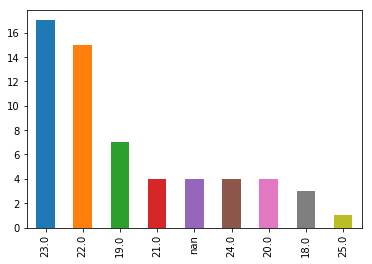

In [3]:
%matplotlib inline

springboard["What is your age?"].value_counts(dropna=False).plot(kind="bar")

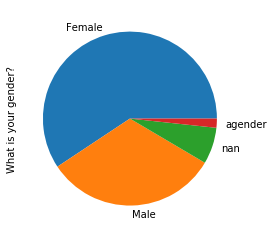

In [4]:
springboard["What is your gender?"].value_counts(dropna=False).plot(kind="pie")

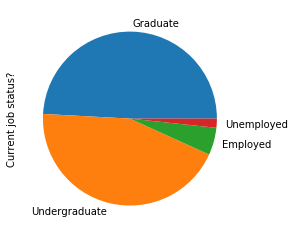

In [5]:
springboard["Current job status?"].value_counts(dropna=False).plot(kind="pie")

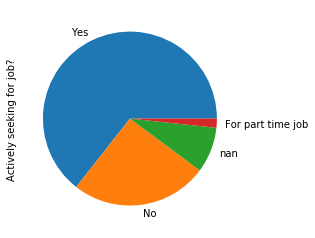

In [7]:
springboard["Actively seeking for job?"].value_counts(dropna=False).plot(kind="pie")

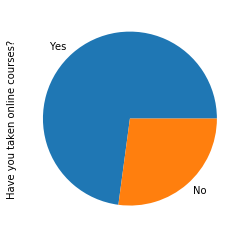

In [8]:
springboard["Have you taken online courses?"].value_counts(dropna=False).plot(kind="pie")

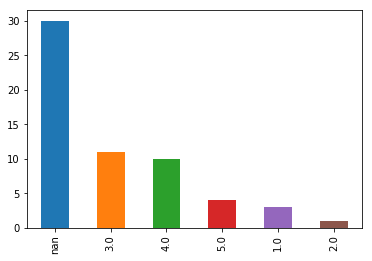

In [9]:
springboard["If not taken any online course, how likely will you take online courses in the future?"].value_counts(dropna=False).plot(kind="bar")

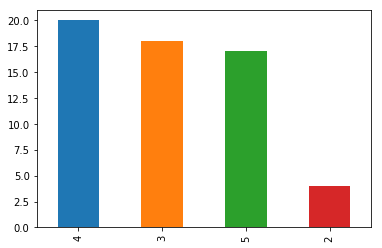

In [10]:
springboard["How important would you rate programming as a necessary skill for jobs?"].value_counts(dropna=False).plot(kind="bar")

In [12]:
springboard["How much are you willing to spend for an online programming course that can potentially benefit your future career?"].value_counts(dropna=False)

$500 ~ 1,000      45
$1,000 ~ 3,000    11
>$5,000            3
Name: How much are you willing to spend for an online programming course that can potentially benefit your future career?, dtype: int64

In [15]:
import numpy as np

def clean_willing_cost(value):
    if value == ">$5,000":
        return 5000
    value = value.replace(",", "").replace("$", "")
    wcost_high, wcost_low = value.split(" ~ ")
    return (int(wcost_high) + int(wcost_low)) / 2

In [16]:
springboard["willing_cost"] = springboard["How much are you willing to spend for an online programming course that can potentially benefit your future career?"].apply(clean_willing_cost)
springboard["willing_cost"].value_counts(dropna=False)

750.0     45
2000.0    11
5000.0     3
Name: willing_cost, dtype: int64

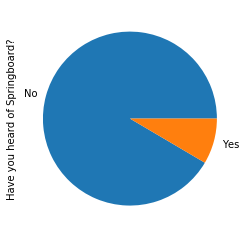

In [17]:
springboard["Have you heard of Springboard?"].value_counts(dropna=False).plot(kind="pie")

In [19]:
springboard["Taking a look at the course structure below, which program are you more likely to choose?"].value_counts(dropna=False)

Springboard Career Track      16
Self-guided Online Courses    16
Springboard Skill Track       13
Master's Program               8
Bootcamp                       6
Name: Taking a look at the course structure below, which program are you more likely to choose?, dtype: int64

In [20]:
wcost_and_program = springboard.groupby(["willing_cost", "Taking a look at the course structure below, which program are you more likely to choose?"])
wcost_and_program.groups

{(750.0, 'Bootcamp'): Int64Index([8, 23, 44, 52], dtype='int64'),
 (750.0,
  "Master's Program"): Int64Index([1, 14, 15, 32, 47, 51], dtype='int64'),
 (750.0,
  'Self-guided Online Courses'): Int64Index([2, 9, 10, 13, 25, 37, 39, 45, 53, 54, 55, 56, 57], dtype='int64'),
 (750.0,
  'Springboard Career Track'): Int64Index([7, 11, 17, 20, 21, 22, 24, 26, 31, 33, 41, 50], dtype='int64'),
 (750.0,
  'Springboard Skill Track'): Int64Index([0, 3, 5, 6, 19, 34, 36, 38, 46, 48], dtype='int64'),
 (2000.0, 'Bootcamp'): Int64Index([16], dtype='int64'),
 (2000.0, "Master's Program"): Int64Index([18], dtype='int64'),
 (2000.0,
  'Self-guided Online Courses'): Int64Index([12, 28, 40], dtype='int64'),
 (2000.0,
  'Springboard Career Track'): Int64Index([27, 30, 42, 49], dtype='int64'),
 (2000.0, 'Springboard Skill Track'): Int64Index([4, 43], dtype='int64'),
 (5000.0, 'Bootcamp'): Int64Index([29], dtype='int64'),
 (5000.0, "Master's Program"): Int64Index([58], dtype='int64'),
 (5000.0, 'Springboard Sk

In [21]:
wcost_and_program.size()

willing_cost  Taking a look at the course structure below, which program are you more likely to choose?
750.0         Bootcamp                                                                                      4
              Master's Program                                                                              6
              Self-guided Online Courses                                                                   13
              Springboard Career Track                                                                     12
              Springboard Skill Track                                                                      10
2000.0        Bootcamp                                                                                      1
              Master's Program                                                                              1
              Self-guided Online Courses                                                                    3
              Sp

In [22]:
gender_and_program = springboard.groupby(["What is your gender?", "Taking a look at the course structure below, which program are you more likely to choose?"])
gender_and_program.size()

What is your gender?  Taking a look at the course structure below, which program are you more likely to choose?
Female                Bootcamp                                                                                      3
                      Master's Program                                                                              4
                      Self-guided Online Courses                                                                   12
                      Springboard Career Track                                                                      9
                      Springboard Skill Track                                                                       7
Male                  Bootcamp                                                                                      3
                      Master's Program                                                                              1
                      Self-guided Online Courses              

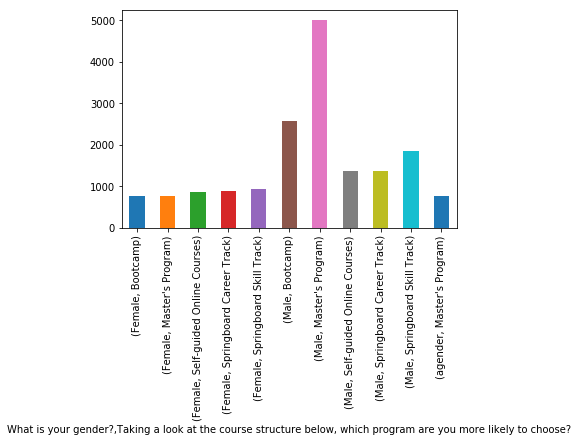

In [23]:
gender_and_program["willing_cost"].agg(np.mean).plot(kind="bar")